# Downloading Images using the Flickr API

For many image processing problems, one needs to create a dataset of images of particular classes.  The [ImageNet site](http://www.image-net.org/) has an enormous set of images of 1000 different classes with bounding boxes.  But, this set may not have the exact image classes you are looking for.  An alternative simple way to generate image datasets is via the [Flickr API](https://stuvel.eu/flickrapi-doc/), which gives you access to millions of images in the Flickr database.

In this demo, you will learn to:
* Load images from the Flickr API
* Resize images to a desired shape
* Save images to a file

## Installing and Loading the Flickr API package

The [Flickr API](https://stuvel.eu/flickrapi-doc/) provides a simple python interface.  You will need to install it via

    pip install flickrapi
   
You can validate the installation by import the package.

In [1]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

To use the Flickr API, you need to apply for keys.  You can do this on the [Flickr website](https://www.flickr.com/services/api/misc.api_keys.html).  Once you have the keys, they can be set as follows.

In [2]:
api_key = u'45907175c467a1e968e47ab65ac17f7d'
api_secret = u'xxxxxxxxxxxxxxxx'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

## Loading the Images
The `flickr.walk()` function provides a generator of URLs for photos with a particular `keyword`.  To illustrate the method, we will get a number of elephant images.

In [3]:
keyword = 'elephant'
dir_name = 'elephant'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

Create a directory with the name of the keyword for the images.

In [4]:
import os
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

Will store images in directory elephant


Next, we create a routine for displaying images.

In [5]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Now, we walk through the images and save the files.

In [6]:
import warnings
    
nimage = 10
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant',anti_aliasing=True, anti_aliasing_sigma=None)
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,keyword, i)  
        skimage.io.imsave(local_name, im2)      
        print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

elephant/elephant_0000.jpg
elephant/elephant_0001.jpg
elephant/elephant_0002.jpg
elephant/elephant_0003.jpg
elephant/elephant_0004.jpg
elephant/elephant_0005.jpg
elephant/elephant_0006.jpg
elephant/elephant_0007.jpg
elephant/elephant_0008.jpg
elephant/elephant_0009.jpg


We plot some of the loaded images.  Some of them may be slightly distorted since the re-shaping could have changed the aspect ratio.

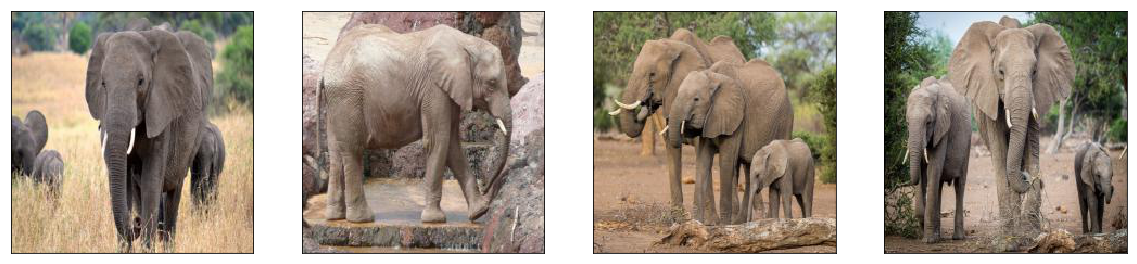

In [7]:
plt.figure(figsize=(20,20))
nplot = 4
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(keyword,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)